# Analisis exploratorio

Leemos los datos 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.stats import chi2
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("/work/data/interim/000_ImportarRedshift.csv")
df

,bankrupt,roac_before_interest_and_depreciation_before_interest,roaa_before_interest_and__after_tax,roab_before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre_tax_net_interest_rate,after_tax_net_interest_rate,non_industry_income_and_expenditurerevenue,...,net_income_to_total_assets,total_assets_to_gnp_price,no_credit_interval,gross_profit_to_sales,net_income_to_stockholders_equity,liability_to_equity,degree_of_financial_leverage_dfl,interest_coverage_ratio_interest_expense_to_ebit,net_income_flag,equity_to_liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [3]:
print("Numero de empresas : ",df.shape[0],"\nNumero de variables : ", df.shape[1])

Numero de empresas :  6819 
Numero de variables :  96


In [4]:
duplicados = df.duplicated()
print("Numero de filas duplicadas :",len(df[duplicados]))

Numero de filas duplicadas : 0


### Observaciones

Podemos ver que todas las variables que temos son numéricas. Por los valores que tienen las columnas Net Income Flag y Liability-Assets Flag deben ser categóricas. No tenemos valores duplicados.

## Distribution de las variables categóricas

Las columnas categóricas que tenemos son Net Income Flag, Liability-Assets Flag y nuestra variable objetivo Bankruptcy

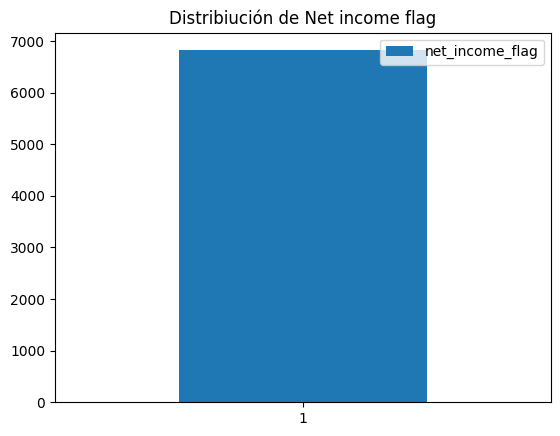

In [5]:
pd.DataFrame(df['net_income_flag'].value_counts()).plot.bar(y='net_income_flag', rot=0)
plt.title("Distribiución de Net income flag")
plt.show()

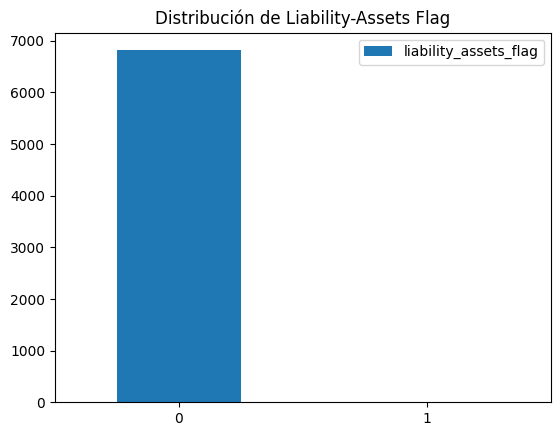

In [6]:
pd.DataFrame(df['liability_assets_flag'].value_counts()).plot.bar(y='liability_assets_flag', rot=0)
plt.title("Distribución de Liability-Assets Flag")
plt.show()

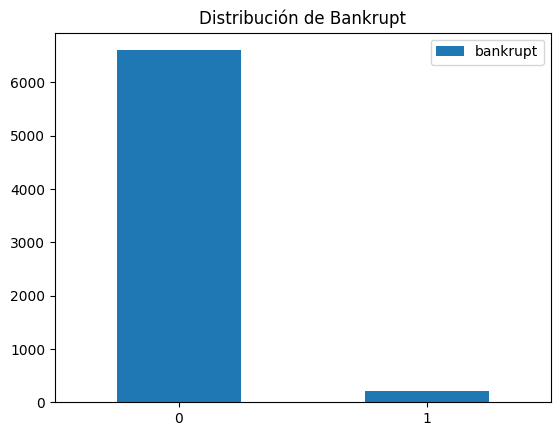

   bankrupt
0      6599
1       220


In [7]:
pd.DataFrame(df['bankrupt'].value_counts()).plot.bar(y='bankrupt', rot=0)
plt.title("Distribución de Bankrupt")
plt.show()
print(pd.DataFrame(df['bankrupt'].value_counts()))

### Observaciones de los datos categóricos

- Net income flag: Verdadera para el 100% de las empresas, por lo que esta columna se puede eliminar.

- Liability-Assets Flag: Verdadera para el 0.1% de las empresas del conjunto de datos total.

- Bankrupt: esta es nuestra variable objetivo, a partir de la distribución podemos observar el desequilibrio de clases (debe tratarse antes del modelado).

## Análisis de correlaciones

Utiliza el método corr() de pandas para calcular la matriz de correlación entre todas las variables numéricas, incluida la variable objetivo. Luego, ordena las correlaciones con la variable objetivo en términos absolutos para identificar las variables con la mayor correlación.

In [8]:
correlations = df.corr()
correlations

,bankrupt,roac_before_interest_and_depreciation_before_interest,roaa_before_interest_and__after_tax,roab_before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre_tax_net_interest_rate,after_tax_net_interest_rate,non_industry_income_and_expenditurerevenue,...,net_income_to_total_assets,total_assets_to_gnp_price,no_credit_interval,gross_profit_to_sales,net_income_to_stockholders_equity,liability_to_equity,degree_of_financial_leverage_dfl,interest_coverage_ratio_interest_expense_to_ebit,net_income_flag,equity_to_liability
bankrupt,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,...,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,NaN,-0.083048
roac_before_interest_and_depreciation_before_interest,-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,...,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,NaN,0.052416
roaa_before_interest_and__after_tax,-0.282941,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,...,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,NaN,0.057887
roab_before_interest_and_depreciation_after_tax,-0.273051,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,...,0.912040,-0.089088,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,NaN,0.056430
operating_gross_margin,-0.100043,0.334719,0.326969,0.333749,1.000000,0.999518,0.005745,0.032493,0.027175,0.051438,...,0.300143,0.022672,0.004205,1.000000,0.075304,-0.085434,-0.011806,-0.001167,NaN,0.120029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
liability_to_equity,0.166812,-0.143629,-0.141039,-0.142838,-0.085434,-0.085407,0.001541,-0.004043,-0.004390,-0.011899,...,-0.159697,0.021982,-0.003724,-0.085434,-0.791836,1.000000,0.002119,0.001487,NaN,-0.159654
degree_of_financial_leverage_dfl,0.010508,-0.016575,-0.011515,-0.014663,-0.011806,-0.011268,0.000935,0.000855,0.000927,-0.000556,...,-0.010463,-0.001881,-0.008812,-0.011806,-0.000093,0.002119,1.000000,0.016513,NaN,-0.016739
interest_coverage_ratio_interest_expense_to_ebit,-0.005509,0.010573,0.013372,0.011473,-0.001167,-0.001158,0.000393,0.000984,0.000957,0.001024,...,0.012746,0.000239,0.001027,-0.001169,0.005147,0.001487,0.016513,1.000000,NaN,-0.008339
net_income_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


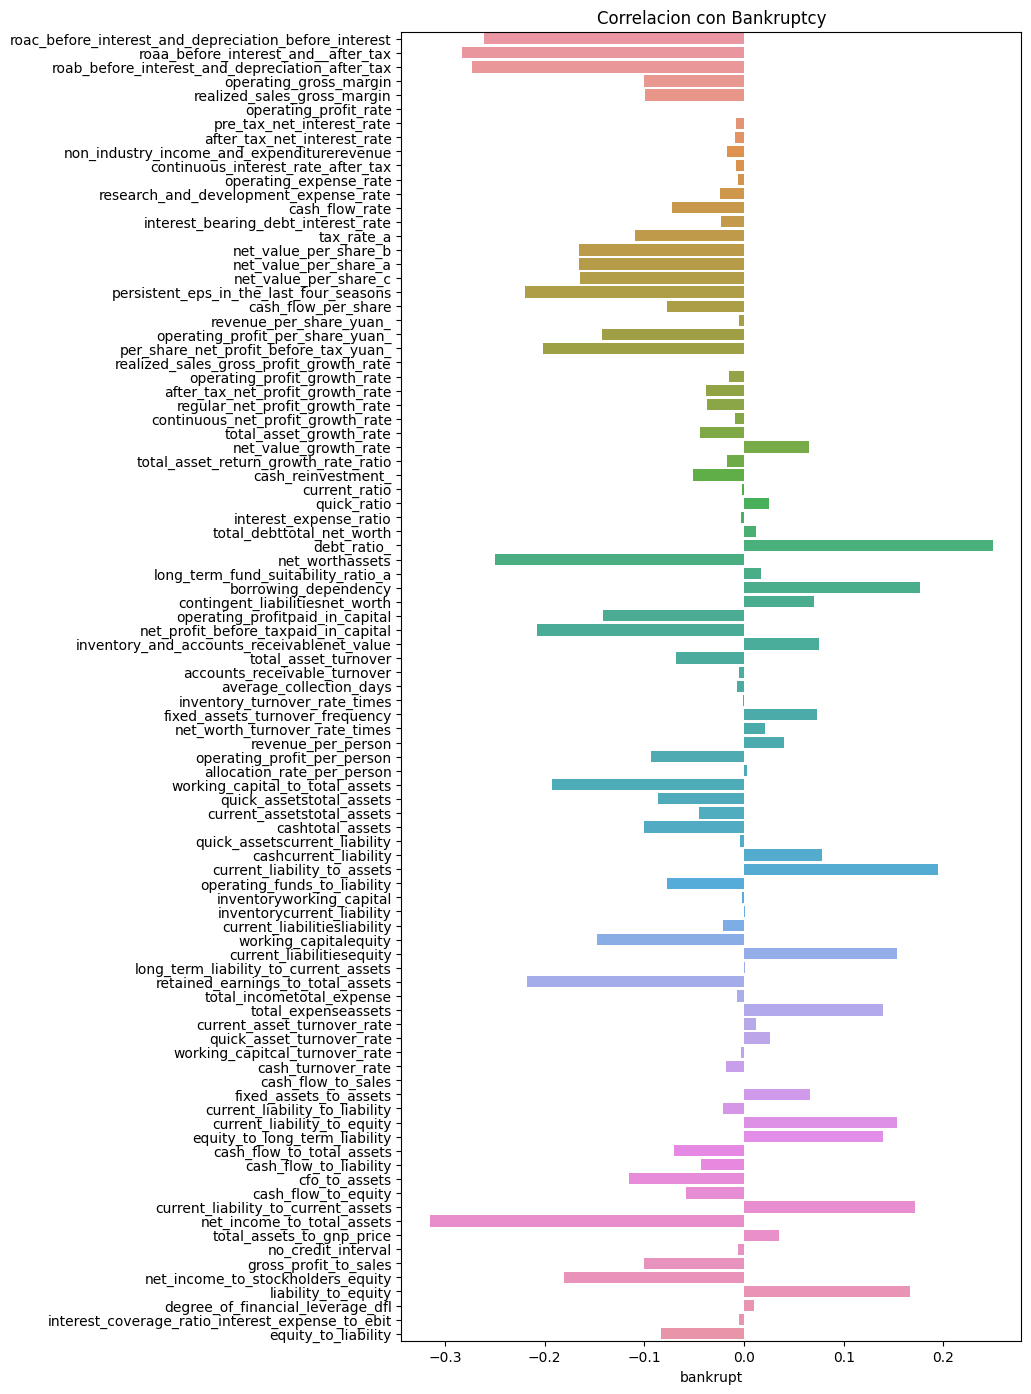

In [9]:
bankruptcy_corr = pd.DataFrame(df.corr())
bankruptcy_corr = pd.DataFrame(bankruptcy_corr['bankrupt'])

# Remove specific indices, all 3 are categorical
categoricas = ['liability_assets_flag', 'net_income_flag','bankrupt']
bankruptcy_corr = bankruptcy_corr.drop(categoricas)

plt.figure(figsize=(8, 17))
sns.barplot(y=bankruptcy_corr.index,x=bankruptcy_corr['bankrupt'])
plt.title("Correlacion con Bankruptcy")
plt.show()

### Revisión de features con correlación mas fuerte con 'Bankrupt?' (>=10%)

In [10]:
for key, value in bankruptcy_corr.items():
    print(f"{key}: {value}")

bankrupt: roac_before_interest_and_depreciation_before_interest   -0.260807
roaa_before_interest_and__after_tax                     -0.282941
roab_before_interest_and_depreciation_after_tax         -0.273051
operating_gross_margin                                  -0.100043
realized_sales_gross_margin                             -0.099445
                                                           ...   
net_income_to_stockholders_equity                       -0.180987
liability_to_equity                                      0.166812
degree_of_financial_leverage_dfl                         0.010508
interest_coverage_ratio_interest_expense_to_ebit        -0.005509
equity_to_liability                                     -0.083048
Name: bankrupt, Length: 93, dtype: float64


In [11]:
temp_corr = bankruptcy_corr
temp_corr['bankrupt'] = temp_corr['bankrupt'].apply(abs)
print("\nColumnas con correlación (>|0.10|) :\n")
for i in temp_corr[(temp_corr["bankrupt"] > 0.10)].index:
    print("* "+i+"\t")


Columnas con correlación (>|0.10|) :

* roac_before_interest_and_depreciation_before_interest	
* roaa_before_interest_and__after_tax	
* roab_before_interest_and_depreciation_after_tax	
* operating_gross_margin	
* tax_rate_a	
* net_value_per_share_b	
* net_value_per_share_a	
* net_value_per_share_c	
* persistent_eps_in_the_last_four_seasons	
* operating_profit_per_share_yuan_	
* per_share_net_profit_before_tax_yuan_	
* debt_ratio_	
* net_worthassets	
* borrowing_dependency	
* operating_profitpaid_in_capital	
* net_profit_before_taxpaid_in_capital	
* working_capital_to_total_assets	
* cashtotal_assets	
* current_liability_to_assets	
* working_capitalequity	
* current_liabilitiesequity	
* retained_earnings_to_total_assets	
* total_expenseassets	
* current_liability_to_equity	
* equity_to_long_term_liability	
* cfo_to_assets	
* current_liability_to_current_assets	
* net_income_to_total_assets	
* gross_profit_to_sales	
* net_income_to_stockholders_equity	
* liability_to_equity	


Se deben eliminar las features que tienen una correlación de 1 entre si ya que explican la misma información

In [12]:
# Obtener la matriz de correlación
corr_matrix = df.corr()

# Crear una lista para almacenar las columnas a eliminar
columns_to_drop = []

# Iterar sobre la matriz de correlación
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            column_name = corr_matrix.columns[j]
            columns_to_drop.append(column_name)

# Eliminar las columnas del DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Imprimir el DataFrame actualizado
df.head(5)

,bankrupt,roac_before_interest_and_depreciation_before_interest,operating_gross_margin,operating_profit_rate,non_industry_income_and_expenditurerevenue,operating_expense_rate,research_and_development_expense_rate,cash_flow_rate,interest_bearing_debt_interest_rate,tax_rate_a,...,cash_flow_to_equity,current_liability_to_current_assets,liability_assets_flag,total_assets_to_gnp_price,no_credit_interval,net_income_to_stockholders_equity,degree_of_financial_leverage_dfl,interest_coverage_ratio_interest_expense_to_ebit,net_income_flag,equity_to_liability
0,1,0.370594,0.601457,0.998969,0.302646,1.256969e-04,0.0,0.458143,0.000725,0.0,...,0.312905,0.118250,0,0.009219,0.622879,0.827890,0.026601,0.564050,1,0.016469
1,1,0.464291,0.610235,0.998946,0.303556,2.897851e-04,0.0,0.461867,0.000647,0.0,...,0.314163,0.047775,0,0.008323,0.623652,0.839969,0.264577,0.570175,1,0.020794
2,1,0.426071,0.601450,0.998857,0.302035,2.361297e-04,25500000.0,0.458521,0.000790,0.0,...,0.314515,0.025346,0,0.040003,0.623841,0.836774,0.026555,0.563706,1,0.016474
3,1,0.399844,0.583541,0.998700,0.303350,1.078888e-04,0.0,0.465705,0.000449,0.0,...,0.302382,0.067250,0,0.003252,0.622929,0.834697,0.026697,0.564663,1,0.023982
4,1,0.465022,0.598783,0.998973,0.303475,7.890000e+09,0.0,0.462746,0.000686,0.0,...,0.311567,0.047725,0,0.003878,0.623521,0.839973,0.024752,0.575617,1,0.035490


## Distancia de Mahalanobis para detectar outliers

In [13]:
#Funcion para calcular la distancia de Mahalanobis
def mahalanobis(x=None, data=None):
    x_mu = x - np.mean(data)
    left = np.dot(x_mu, inv_covmat_regularized)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

# Calcular la matriz de covarianza
cov_matrix = np.cov(df.values.T)

# Aplicar regularización de Ridge a la matriz de covarianza
alpha = 0.5
cov_matrix_regularized = cov_matrix + alpha * np.eye(cov_matrix.shape[0])

# Calcular la inversa de la matriz de covarianza regularizada
inv_covmat_regularized = np.linalg.inv(cov_matrix_regularized)

# Agregar la distancia a cada una de las filas
df['mahalanobis'] = mahalanobis(x=df, data=df[df.columns])

# Imprimir el DataFrame actualizado
df.head()


,bankrupt,roac_before_interest_and_depreciation_before_interest,operating_gross_margin,operating_profit_rate,non_industry_income_and_expenditurerevenue,operating_expense_rate,research_and_development_expense_rate,cash_flow_rate,interest_bearing_debt_interest_rate,tax_rate_a,...,current_liability_to_current_assets,liability_assets_flag,total_assets_to_gnp_price,no_credit_interval,net_income_to_stockholders_equity,degree_of_financial_leverage_dfl,interest_coverage_ratio_interest_expense_to_ebit,net_income_flag,equity_to_liability,mahalanobis
0,1,0.370594,0.601457,0.998969,0.302646,1.256969e-04,0.0,0.458143,0.000725,0.0,...,0.118250,0,0.009219,0.622879,0.827890,0.026601,0.564050,1,0.016469,7.490199
1,1,0.464291,0.610235,0.998946,0.303556,2.897851e-04,0.0,0.461867,0.000647,0.0,...,0.047775,0,0.008323,0.623652,0.839969,0.264577,0.570175,1,0.020794,11.888317
2,1,0.426071,0.601450,0.998857,0.302035,2.361297e-04,25500000.0,0.458521,0.000790,0.0,...,0.025346,0,0.040003,0.623841,0.836774,0.026555,0.563706,1,0.016474,115.143102
3,1,0.399844,0.583541,0.998700,0.303350,1.078888e-04,0.0,0.465705,0.000449,0.0,...,0.067250,0,0.003252,0.622929,0.834697,0.026697,0.564663,1,0.023982,24.153524
4,1,0.465022,0.598783,0.998973,0.303475,7.890000e+09,0.0,0.462746,0.000686,0.0,...,0.047725,0,0.003878,0.623521,0.839973,0.024752,0.575617,1,0.035490,9.086824


In [14]:
#Calcular el valor p para cada una de las distancias mahalanobis
df['p'] = 1 - chi2.cdf(df['mahalanobis'], 94)

#Filtrar por los paises que consideramos outliers debido a que tienen un valor p menor o igual a 0.01
df.query('p<=0.001')

,bankrupt,roac_before_interest_and_depreciation_before_interest,operating_gross_margin,operating_profit_rate,non_industry_income_and_expenditurerevenue,operating_expense_rate,research_and_development_expense_rate,cash_flow_rate,interest_bearing_debt_interest_rate,tax_rate_a,...,liability_assets_flag,total_assets_to_gnp_price,no_credit_interval,net_income_to_stockholders_equity,degree_of_financial_leverage_dfl,interest_coverage_ratio_interest_expense_to_ebit,net_income_flag,equity_to_liability,mahalanobis,p
123,0,0.492663,0.604023,0.998968,0.303636,1.677886e-04,0.000000e+00,0.476869,0.000471,0.226136,...,0,0.001462,0.624334,0.845345,0.026817,0.565281,1,0.041220,199.653441,1.356476e-09
168,0,0.496222,0.595195,0.998967,0.303559,2.510000e+09,3.570000e+08,0.467343,0.000370,0.000000,...,0,0.013290,0.624067,0.840645,0.027524,0.567223,1,0.024020,368.218445,0.000000e+00
236,1,0.438112,0.595094,0.998814,0.303148,1.791209e-04,1.020000e+08,0.462421,0.000876,0.000000,...,0,0.012289,0.622922,0.836696,0.026423,0.562462,1,0.020129,157.228278,4.748641e-05
379,1,0.453956,0.665151,0.996295,0.272989,3.824214e-03,0.000000e+00,0.461745,0.000364,0.000000,...,0,0.003736,0.679350,0.831484,0.026351,0.561557,1,0.013225,2953.780923,0.000000e+00
402,0,0.511237,0.600066,0.999039,0.303522,3.380000e+07,4.070000e+08,0.465360,0.000170,0.094443,...,0,0.009456,0.625638,0.841288,0.026823,0.565307,1,0.039096,148.880255,2.695780e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6579,0,0.523473,0.643855,0.999112,0.303706,6.629440e-04,5.638572e-04,0.485596,0.000000,0.483652,...,0,0.000340,0.624099,0.840939,0.026792,0.565164,1,0.184556,153.403849,1.068488e-04
6610,0,1.000000,0.640684,0.999507,0.303516,2.164715e-04,0.000000e+00,0.476512,0.000000,0.252758,...,0,0.000606,0.623997,0.852566,0.026791,0.565158,1,0.027671,144.016949,6.984318e-04
6625,0,0.475698,0.601551,0.998975,0.303524,1.217652e-04,0.000000e+00,0.462860,0.000253,0.349327,...,0,0.000745,0.623923,0.840500,0.026862,0.565473,1,0.024965,339.340233,0.000000e+00
6696,0,0.506752,0.605169,0.999036,0.303510,1.182961e-04,5.280000e+09,0.463365,0.000490,0.283834,...,0,0.001037,0.623482,0.843016,0.026939,0.565777,1,0.015198,153.859192,9.714508e-05


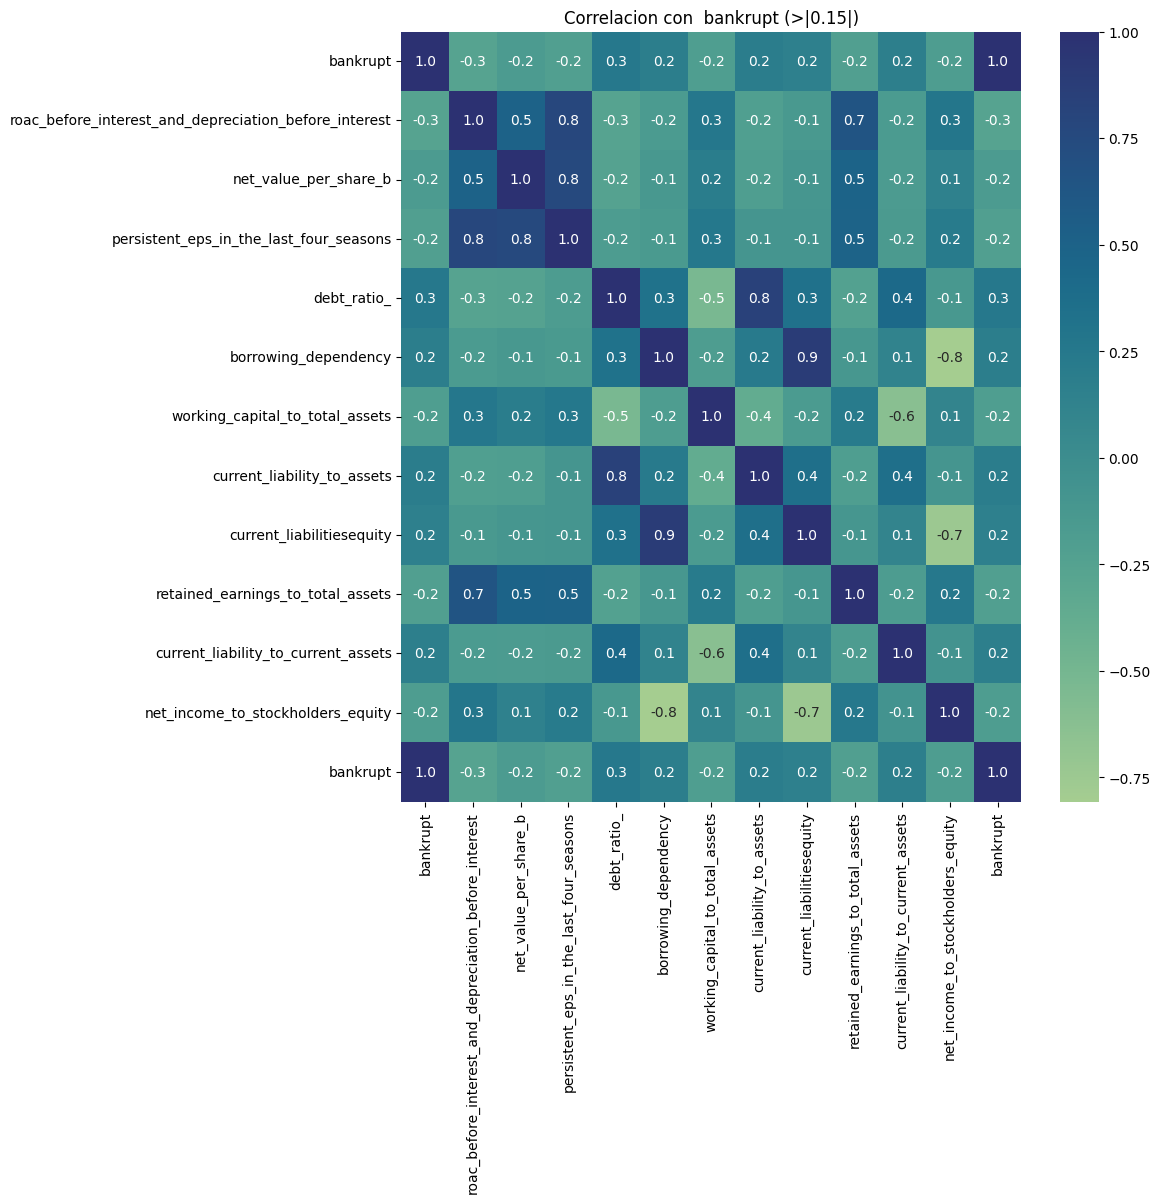

In [15]:
limite = 0.15
bankruptcy_corr = pd.DataFrame(df.corr())
temp_corr = bankruptcy_corr
temp_corr['bankrupt'] = temp_corr['bankrupt'].apply(abs)
columnas_seleccionadas_corr = temp_corr[temp_corr["bankrupt"] > limite].index.tolist() + ["bankrupt"]
corr_test = df[columnas_seleccionadas_corr]

plt.figure(figsize=(10, 10))
corr = corr_test.corr()

sns.heatmap(corr, cmap="crest", annot=True, fmt=".1f")
plt.title(f"Correlacion con  bankrupt (>|{limite}|)")
plt.show()



### Features principales con RandomForest

In [16]:
#Separar features y target
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [17]:
correlations = X.corrwith(y)
correlations_target = correlations.abs()

In [18]:
#Creacion y entrenamiento del modelo
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X, y)

RandomForestClassifier(random_state=42)

Obtener la importancia de los features y ordenar según importancia 

In [19]:
importances = rfc.feature_importances_
sorted_idx = importances.argsort()
for index in sorted_idx:
    print(f"{X.columns[index]}: {round(importances[index]*100, 5)}%")

net_income_flag: 0.0%
p: 0.03467%
liability_assets_flag: 0.0827%
tax_rate_a: 0.34495%
cash_flow_rate: 0.5858%
cfo_to_assets: 0.67069%
contingent_liabilitiesnet_worth: 0.68038%
long_term_fund_suitability_ratio_a: 0.68632%
total_expenseassets: 0.7181%
cash_flow_per_share: 0.73448%
research_and_development_expense_rate: 0.73632%
long_term_liability_to_current_assets: 0.78142%
operating_funds_to_liability: 0.79282%
net_worth_turnover_rate_times: 0.80475%
inventorycurrent_liability: 0.81625%
current_liabilitiesliability: 0.82322%
total_asset_turnover: 0.82447%
cash_reinvestment_: 0.83742%
operating_profit_growth_rate: 0.84449%
cash_flow_to_equity: 0.85801%
inventory_and_accounts_receivablenet_value: 0.87415%
cash_turnover_rate: 0.87629%
quick_assetstotal_assets: 0.88273%
operating_profit_rate: 0.8923%
equity_to_long_term_liability: 0.90494%
current_assetstotal_assets: 0.91769%
realized_sales_gross_profit_growth_rate: 0.94743%
cash_flow_to_total_assets: 0.96001%
total_asset_growth_rate: 0.97

In [20]:
importance_threshold = 0.015 
important_features_indices = [i for i, importance in enumerate(importances) if importance > importance_threshold]
selected_features_importance = [X.columns[i] for i in important_features_indices]

# Combinar características seleccionadas por ambos métodos
selected_features = list(set(columnas_seleccionadas_corr).intersection(set(selected_features_importance)))

print("Características seleccionadas:", selected_features)

Características seleccionadas: ['debt_ratio_', 'retained_earnings_to_total_assets', 'net_income_to_stockholders_equity', 'net_value_per_share_b', 'persistent_eps_in_the_last_four_seasons', 'roac_before_interest_and_depreciation_before_interest', 'borrowing_dependency']


In [21]:
len(columnas_seleccionadas_corr), len(selected_features_importance), len(selected_features)

(13, 22, 7)

In [22]:
fixed_columns = [
    'current_ratio',
    'debt_ratio_',
    'equity_to_liability',
    'interest_coverage_ratio_interest_expense_to_ebit',
    'operating_expense_rate',
    'research_and_development_expense_rate',
    'interest_expense_ratio',
    'total_expenseassets',
    'debt_ratio_',
    'working_capital_to_total_assets',
    'current_liability_to_current_assets',
    'net_income_to_stockholders_equity',
    'operating_gross_margin',
]

In [23]:
filtered_df = df[[y.name] + list(set(fixed_columns + selected_features))]
filtered_df.shape

(6819, 18)

In [24]:
corr_matrix = filtered_df.corr()

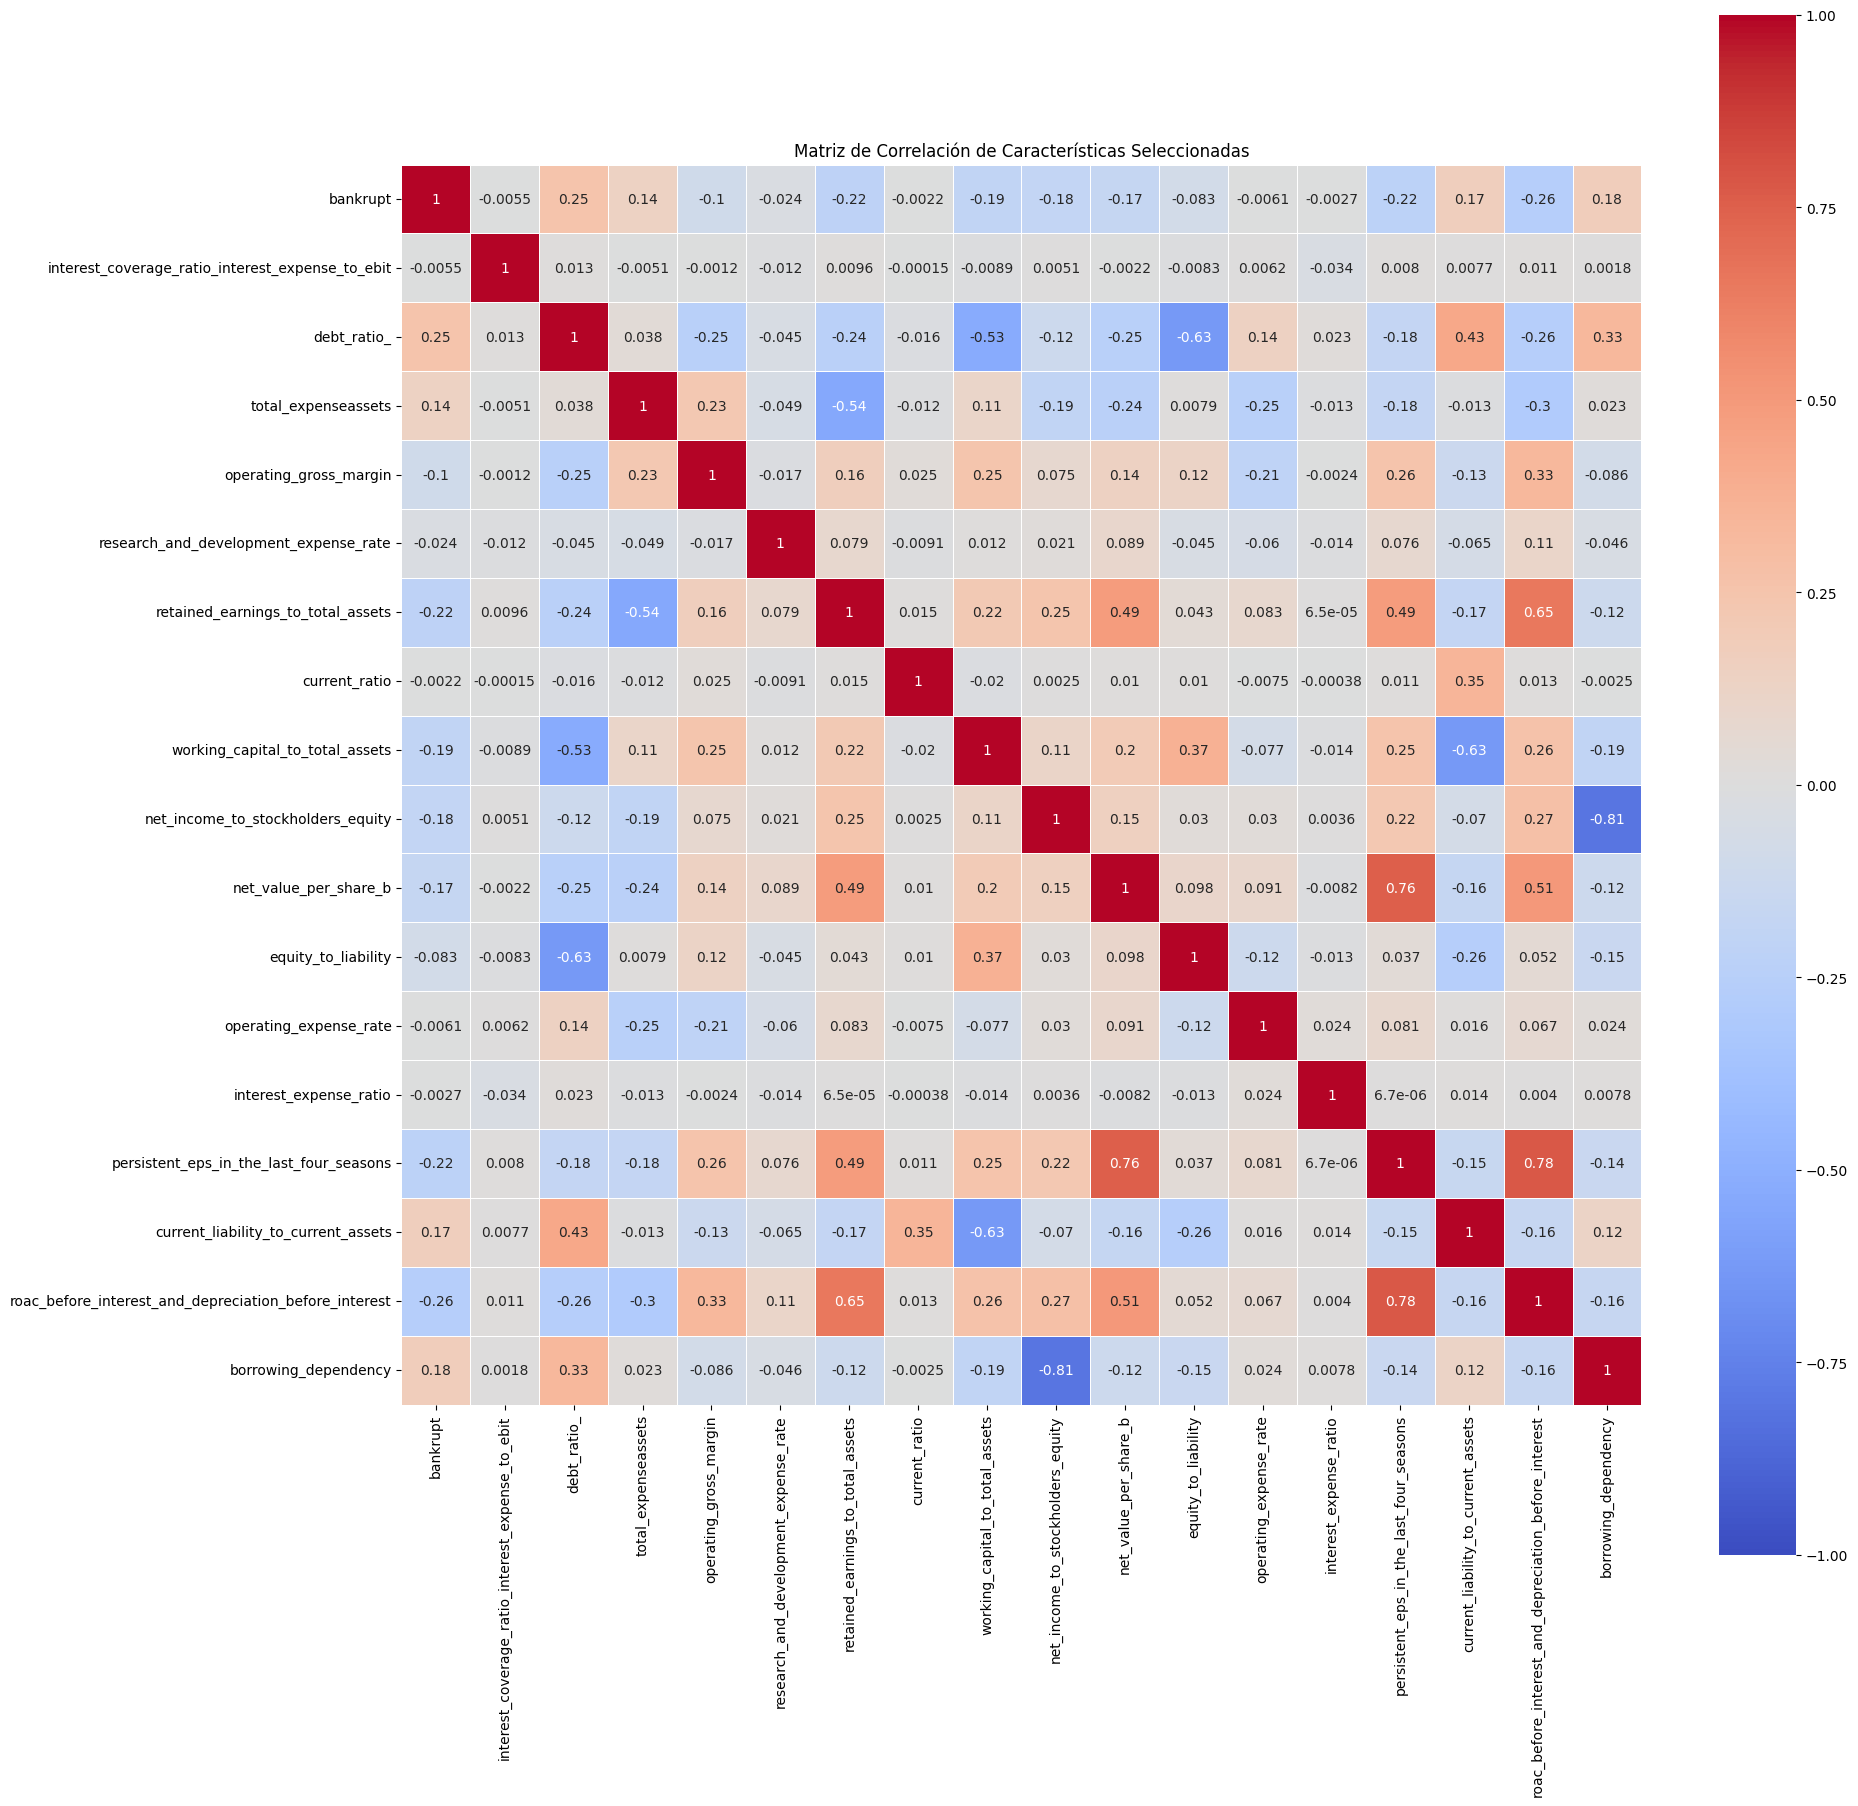

In [25]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Matriz de Correlación de Características Seleccionadas')
plt.show()

In [26]:
filtered_df.to_csv("/work/data/interim/001_Correlation.csv", index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8ba77797-abb8-4bd4-bea9-bb2ef92463f4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>